In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib as inline
import warnings
warnings.filterwarning("ignore")

UsageError: unrecognized arguments: inline


In [5]:
dataset=pd.read_csv("googleplaystore .csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# pd.set_option("display.max_rows",None)
# dataset=pd.read_csv("googleplaystore .csv")
# dataset

In [11]:
# pd.set_option("display.max_columns",None)
# dataset=pd.read_csv("googleplaystore .csv")
# dataset

In [13]:
dataset.drop(10472, axis=0, inplace=True)

In [15]:
dataset["Reviews"]=dataset["Reviews"].astype('int')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [19]:
dataset.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [21]:
dataset["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [23]:
dataset["Size"].isnull().sum()

0

In [25]:
print("Number of M in Size column",dataset["Size"].loc[dataset["Size"].str.contains("M")].value_counts().sum())
print("Numder of K in Size column",dataset["Size"].loc[dataset["Size"].str.contains("k")].value_counts().sum())
print("Number of Varies with device in size column",dataset["Size"].loc[dataset["Size"].str.contains("Varies with device")].value_counts().sum())

Number of M in Size column 8829
Numder of K in Size column 316
Number of Varies with device in size column 1695


In [27]:
 def convert_into_bytes(column_name):
     if isinstance(column_name, str):
       if 'k' in column_name:
          return float(column_name.replace("k", "")) * 1024
     elif 'M' in column_name:
         return float(column_name.replace("M", "")) * 1024 * 1024
     elif 'Varies with device' in column_name:
         return np.nan
     return column_name
# print(convert_into_bytes)

In [29]:
dataset["Size"]=dataset["Size"].apply(convert_into_bytes)

In [31]:
dataset["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [35]:
# dataset=pd.get_dummies(dataset,drop_first=True)
# dataset

In [37]:
# dataset['Size']

In [39]:
def installs(install):
    if isinstance(install,str):
        if "+" in install:
            return install.replace("+","")
    return int(install)

In [41]:
dataset["Installs"]=dataset["Installs"].apply(installs)

In [43]:
dataset["Installs"]=dataset["Installs"].apply(lambda x:x.replace(',','')if ',' in str(x)else x)

In [45]:
dataset["Installs"]=dataset["Installs"].astype(int)

In [47]:
dataset["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [49]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High','VeryHigh', 'Top Notch']
dataset['Installs_category'] = pd.cut(dataset['Installs'], bins=bins, labels=labels)

In [51]:
dataset['Installs_category'].value_counts()

Installs_category
Low                   2161
High                  2118
VeryHigh              2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

In [53]:
dataset["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [55]:
def adjust_price(price):
    if isinstance (price,str):
        if "$" in price:
            return price.replace("$","")
    return price

In [57]:
dataset["Price"]=dataset["Price"].apply(adjust_price)

In [59]:
dataset["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [61]:
dataset["Price"].dtype

dtype('O')

In [63]:
dataset["Price"]=dataset["Price"].astype('float')

In [65]:
dataset.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10840 non-null  object  
 1   Category           10840 non-null  object  
 2   Rating             9366 non-null   float64 
 3   Reviews            10840 non-null  int32   
 4   Size               10840 non-null  object  
 5   Installs           10840 non-null  int32   
 6   Type               10839 non-null  object  
 7   Price              10840 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10840 non-null  object  
 10  Last Updated       10840 non-null  object  
 11  Current Ver        10832 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Installs_category  10840 non-null  category
dtypes: category(1), float64(2), int32(2), object(9)
memory usage: 1.1+ MB


In [69]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,VeryHigh
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,More than moderate


In [71]:
dataset.isnull().sum().sort_values(ascending=False)

Rating               1474
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Size                    0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

<Axes: >

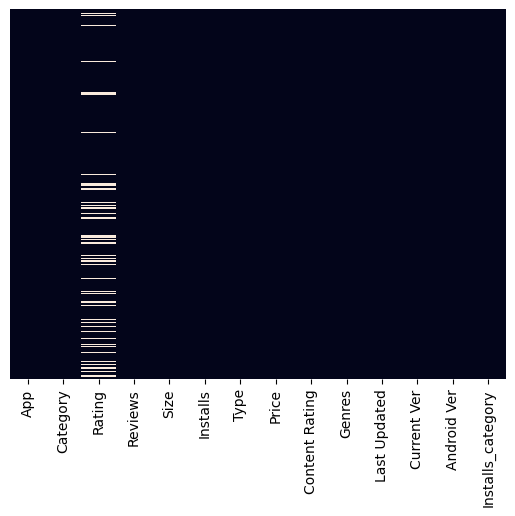

In [73]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

Text(0.5, 1.0, 'percentge of missing values in each columns')

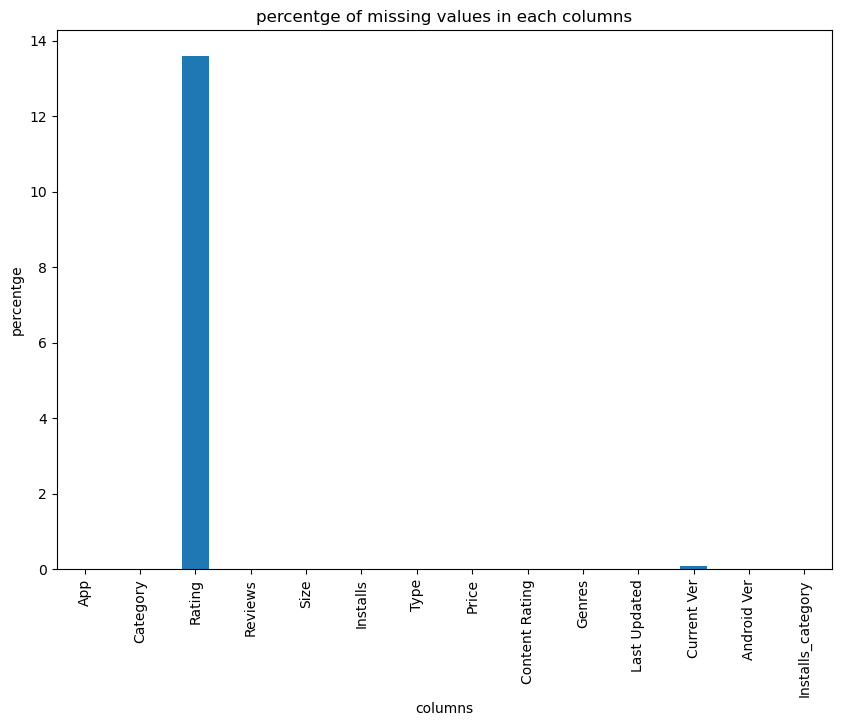

In [74]:
plt.figure(figsize=(10,7))
missing_percentge=dataset.isnull().sum()/len(dataset)*100
missing_percentge.plot(kind="bar")
plt.xlabel("columns")
plt.ylabel("percentge")
plt.title("percentge of missing values in each columns")

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

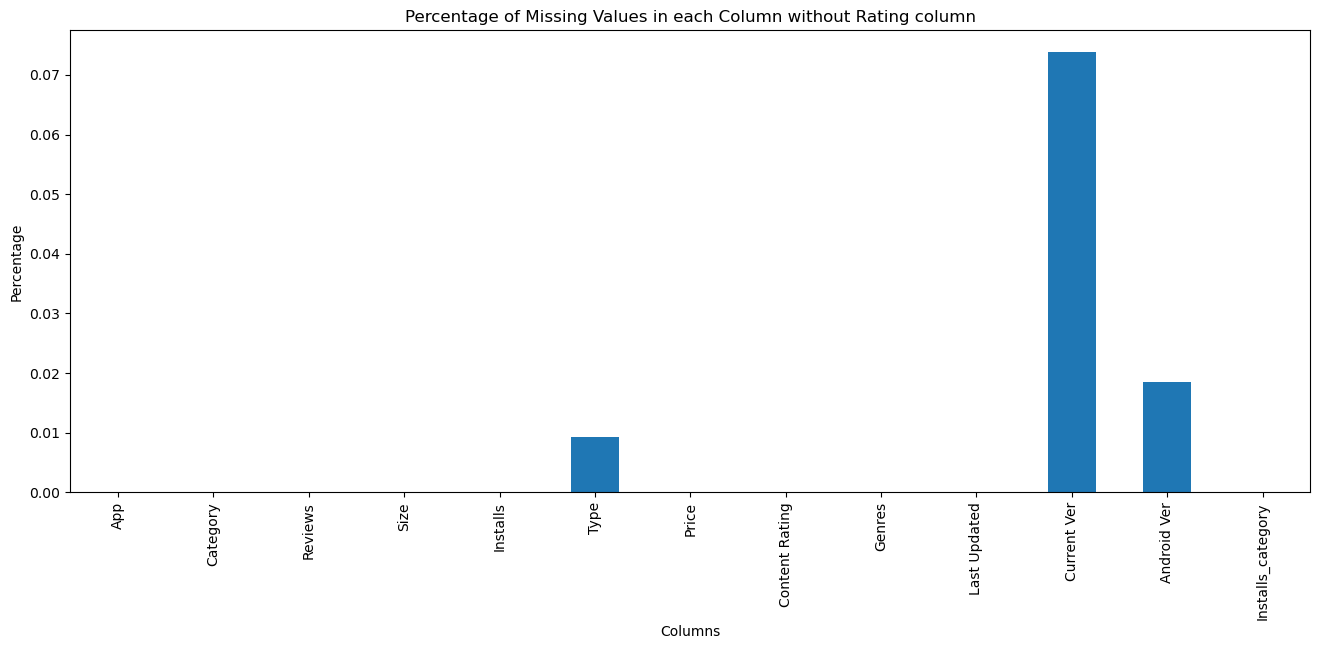

In [76]:
plt.figure(figsize=(16,6))
missing_percentge[missing_percentge < 1].plot(kind='bar')
plt.xlabel('Columns') 
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column without Rating column')

In [78]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_category'],
      dtype='object')

In [81]:
numeric_cols = [i for i in dataset.columns if dataset[i].dtype != 'object' ]

In [83]:
numeric_cols.remove("Installs_category")

In [85]:
numeric_cols

['Rating', 'Reviews', 'Installs', 'Price']

In [87]:
corr = dataset[numeric_cols].corr()

In [89]:
corr

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.643122,-0.009667
Installs,0.051355,0.643122,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.011689,1.000000


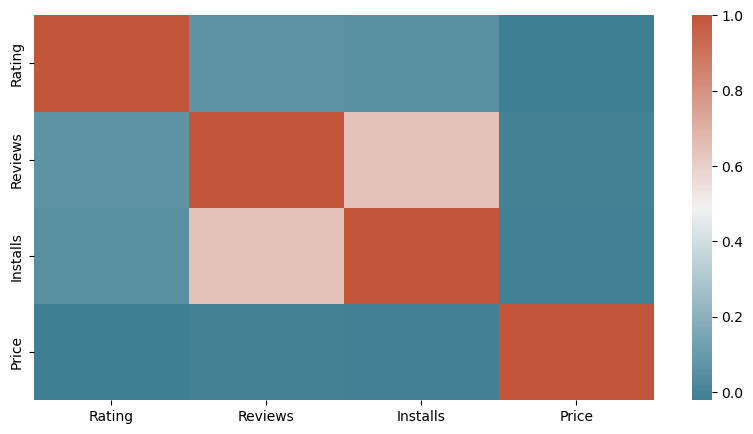

In [91]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [93]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [94]:
from scipy import stats

In [97]:
dataset_clean = dataset.dropna() 
pearson_r, _ = stats.pearsonr(dataset_clean['Reviews'], dataset_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6416


In [99]:
dataset.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)
print(f"Length of the dataframe after removing null values: {len(dataset)}")

Length of the dataframe after removing null values: 10829


In [101]:
dataset.groupby('Installs_category')['Rating'].describe()

C:\Users\rajag\AppData\Local\Temp\ipykernel_8292\4041549305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby('Installs_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
VeryHigh,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [103]:
dataset['Rating'].isnull().sum()

1469

In [105]:
dataset['Installs_category'].loc[dataset['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
VeryHigh                0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

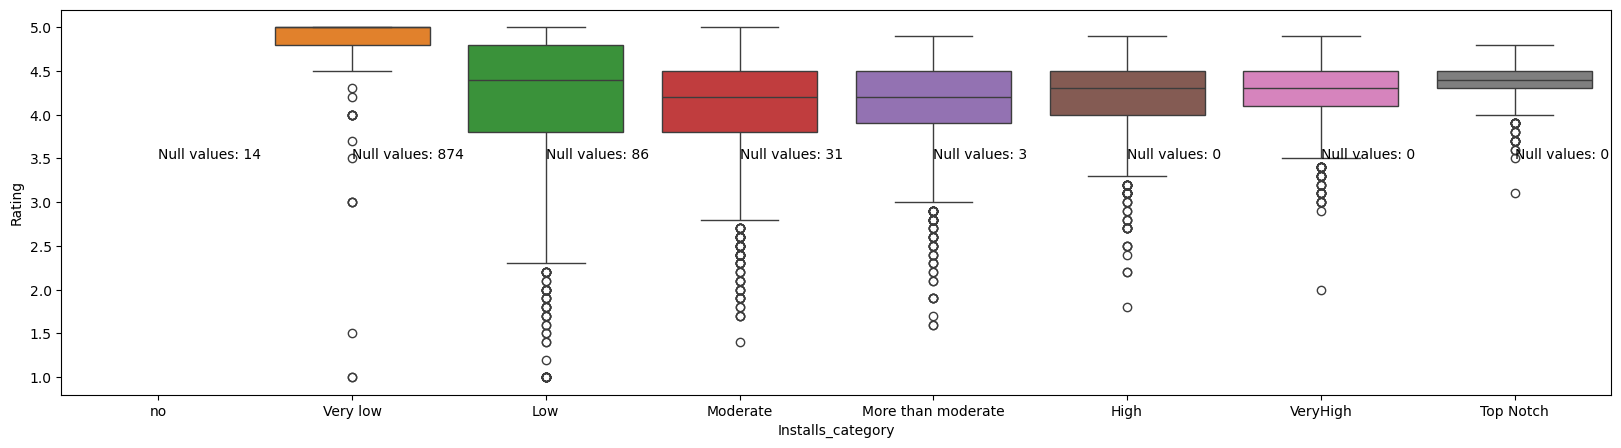

In [107]:
plt.figure(figsize=(20, 5)) 
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=dataset)
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [109]:
def fill_missing_ratings(dataset,category, fill_value):
   filtered_dataset =dataset[(dataset['Installs_category'] ==category) & dataset['Rating'].isnull()]
   dataset.loc[filtered_dataset.index, 'Rating'] = fill_value
   return dataset

In [111]:
dataset=fill_missing_ratings(dataset, 'Low', 4.170970)
dataset=fill_missing_ratings(dataset, 'Very low', 4.637037)
dataset=fill_missing_ratings(dataset, 'Moderate', 4.035417)
dataset=fill_missing_ratings(dataset, 'More than moderate', 4.093255)
dataset=fill_missing_ratings(dataset, 'High', 4.207525)
dataset=fill_missing_ratings(dataset, 'no', 0)

In [113]:
dataset['Installs_category'].loc[dataset['Rating'].isnull()].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: Installs_category, dtype: category
Categories (8, object): ['no' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'VeryHigh' < 'Top Notch'])>

In [115]:
dataset['Rating'].isnull().sum()

0

<Axes: xlabel='Installs_category', ylabel='Reviews'>

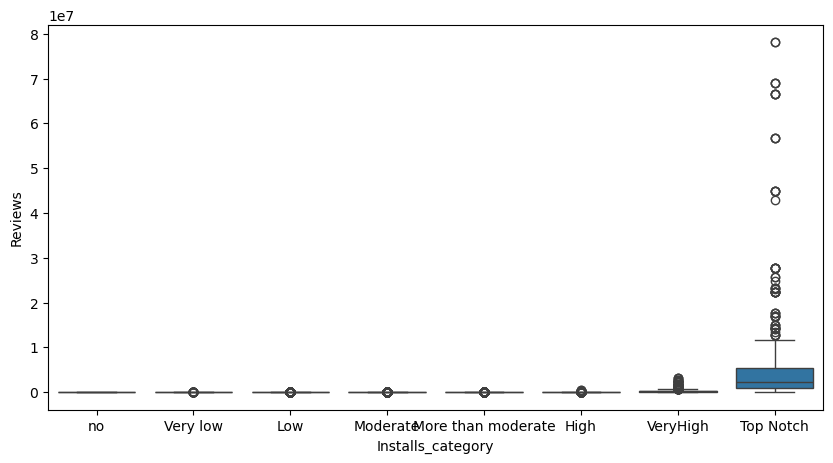

In [117]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Installs_category', y= 'Reviews', data=dataset)

C:\Users\rajag\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Installs_category', ylabel='Reviews'>

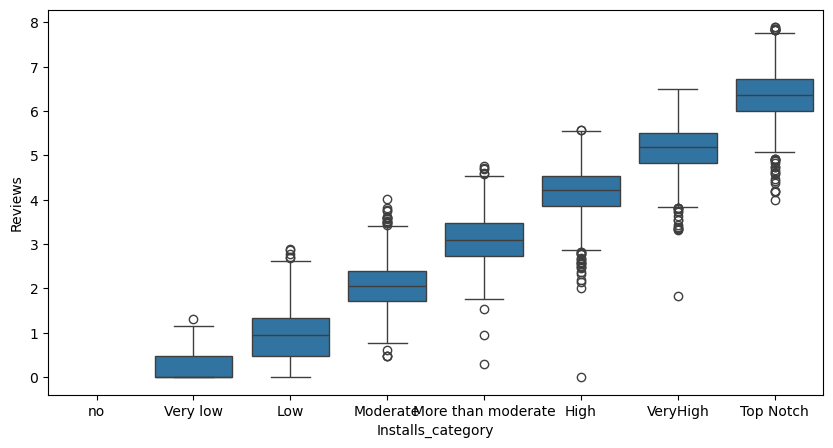

In [119]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Installs_category', y= np.log10(dataset['Reviews']), data=dataset)

<Axes: xlabel='Rating', ylabel='Reviews'>

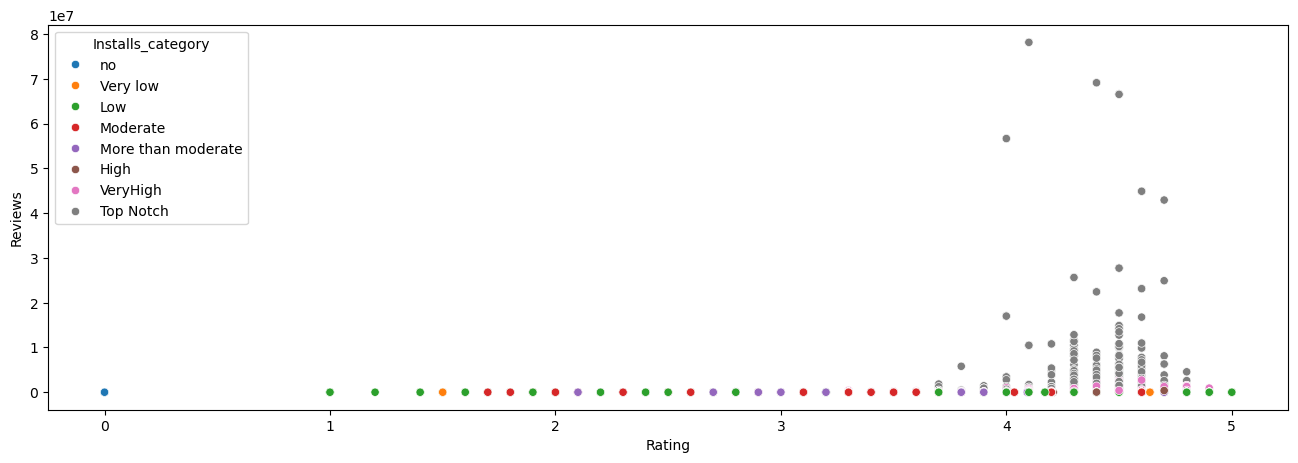

In [121]:
plt.figure(figsize=(16, 5))
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=dataset)

<Axes: xlabel='Reviews', ylabel='Installs'>

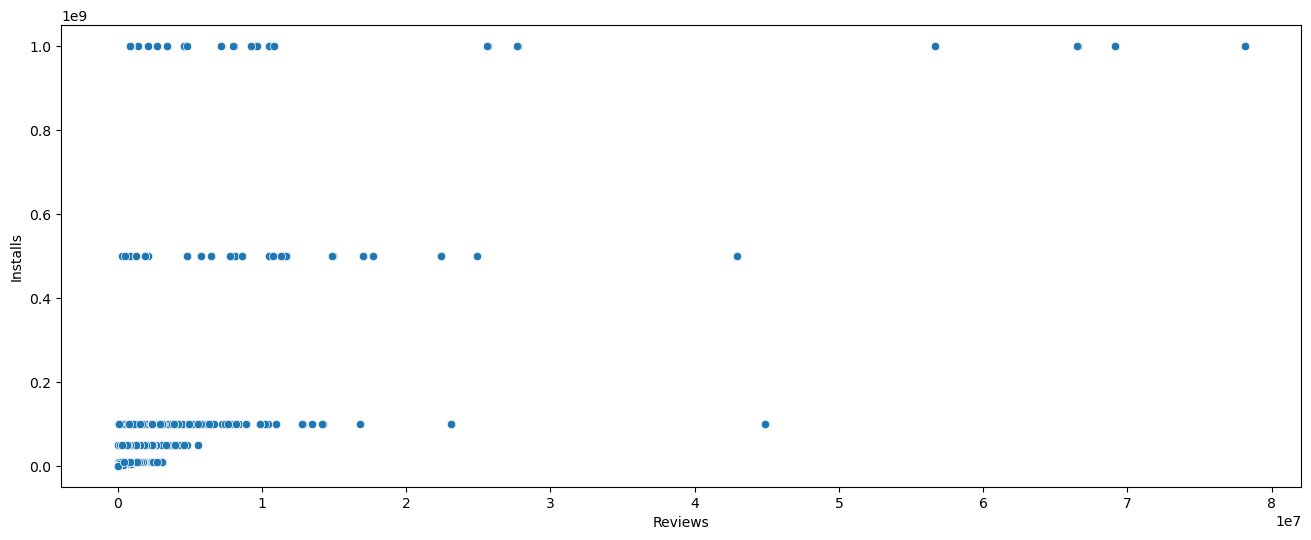

In [122]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=dataset)

C:\Users\rajag\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Reviews', ylabel='Installs'>

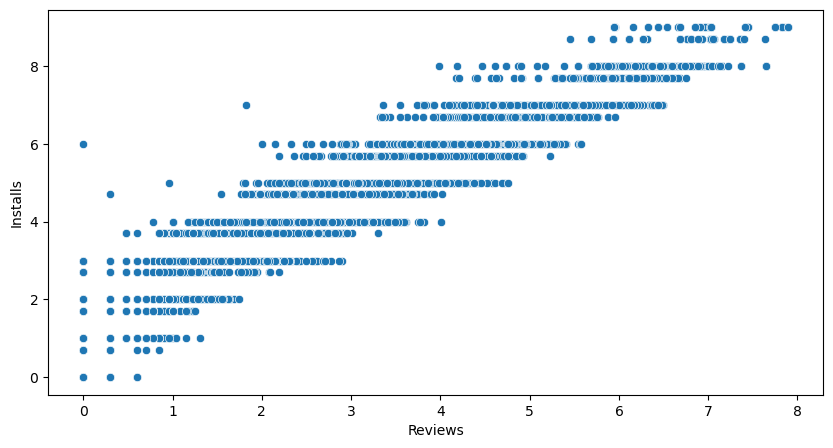

In [123]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=np.log10(dataset['Reviews']), y=np.log10(dataset['Installs']), data=dataset)

<Figure size 1000x500 with 0 Axes>

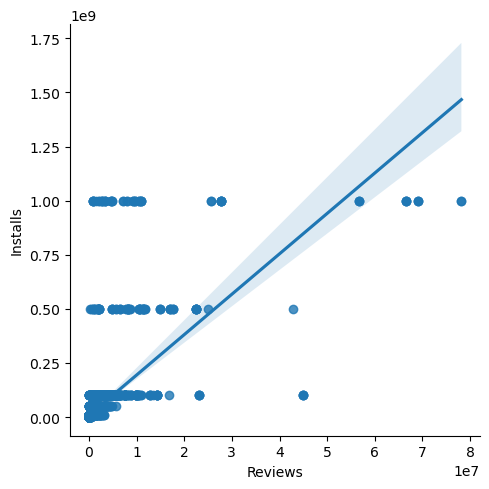

In [125]:
plt.figure(figsize=(10,5))
sns.lmplot(x='Reviews', y='Installs', data=dataset)

In [128]:
dataset.duplicated().sum()

483

In [131]:
for col in dataset.columns:
 print(f"Number of duplicates in {col} column are: {dataset[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size column are: 10372
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Installs_category column are: 10821


In [133]:
print(f"Number of duplicates in dataset are: {dataset.duplicated().sum()}")

Number of duplicates in dataset are: 483


In [135]:
dataset.drop_duplicates(inplace=True)

In [137]:
dataset['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

In [139]:
dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [141]:
dataset.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int32

In [143]:
dataset.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
Name: Rating, dtype: float64

C:\Users\rajag\AppData\Local\Temp\ipykernel_8292\3755613550.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Rating'], color="blue", shade=True)


<Axes: xlabel='Rating', ylabel='Density'>

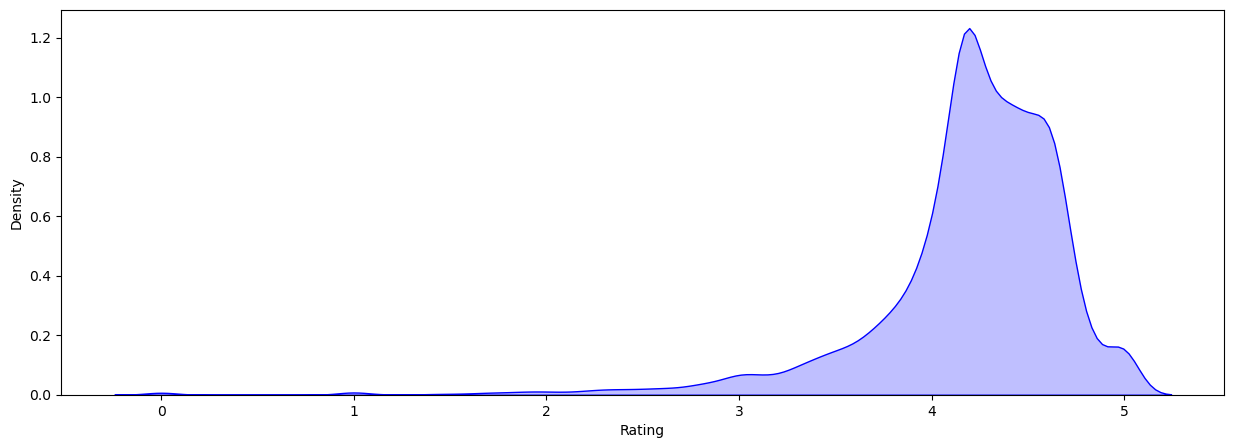

In [145]:
plt.figure(figsize=(15, 5))
sns.kdeplot(dataset['Rating'], color="blue", shade=True)

In [146]:
from sklearn.model_selection import train_test_split

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10346 non-null  object  
 1   Category           10346 non-null  object  
 2   Rating             10346 non-null  float64 
 3   Reviews            10346 non-null  int32   
 4   Size               10346 non-null  object  
 5   Installs           10346 non-null  int32   
 6   Type               10346 non-null  object  
 7   Price              10346 non-null  float64 
 8   Content Rating     10346 non-null  object  
 9   Genres             10346 non-null  object  
 10  Last Updated       10346 non-null  object  
 11  Current Ver        10346 non-null  object  
 12  Android Ver        10346 non-null  object  
 13  Installs_category  10346 non-null  category
dtypes: category(1), float64(2), int32(2), object(9)
memory usage: 1.0+ MB


In [151]:
x=dataset.drop(["Rating","App","Category","Size","Type","Content Rating","Genres","Last Updated","Current Ver","Android Ver","Installs_category"],axis=1)
y=dataset["Rating"]

In [153]:
# x

In [155]:
# y

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2024)

In [159]:
# x_train

In [161]:
# y_train

In [163]:
# x_test

In [165]:
# y_train

In [167]:
dataset.isnull().sum()/len(dataset)*100

App                  0.0
Category             0.0
Rating               0.0
Reviews              0.0
Size                 0.0
Installs             0.0
Type                 0.0
Price                0.0
Content Rating       0.0
Genres               0.0
Last Updated         0.0
Current Ver          0.0
Android Ver          0.0
Installs_category    0.0
dtype: float64

In [169]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10346 non-null  object  
 1   Category           10346 non-null  object  
 2   Rating             10346 non-null  float64 
 3   Reviews            10346 non-null  int32   
 4   Size               10346 non-null  object  
 5   Installs           10346 non-null  int32   
 6   Type               10346 non-null  object  
 7   Price              10346 non-null  float64 
 8   Content Rating     10346 non-null  object  
 9   Genres             10346 non-null  object  
 10  Last Updated       10346 non-null  object  
 11  Current Ver        10346 non-null  object  
 12  Android Ver        10346 non-null  object  
 13  Installs_category  10346 non-null  category
dtypes: category(1), float64(2), int32(2), object(9)
memory usage: 1.0+ MB


In [171]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [172]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100,criterion='absolute_error', random_state=0,oob_score=True)  
model.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', oob_score=True,
                      random_state=0)

In [175]:
print('Train Variance score:', model.score(x_train,y_train))

Train Variance score: 0.5584850520723336


In [177]:
model.oob_score_

0.12260601436692897

In [179]:
y_pred=model.predict(x_test)

In [181]:
from sklearn import metrics
print('Test Variance score:',metrics.r2_score(y_test, y_pred))

Test Variance score: 0.05748162060691131


In [183]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3243185679082133
Mean Squared Error: 0.2531163761786947
Root Mean Squared Error: 0.5031067244419366
